In [70]:
from plotnine import * 
import pandas as pd
import os
import re
from mizani.breaks import date_breaks
from mizani.formatters import date_format
(theme_set(theme_minimal()))
## plots dir if missing
if not os.path.isdir("plots"):
    os.mkdir("plots")
## helper for exporting plots
def export_plot(plot: ggplot, filename:str, plots_dir:str = "plots", **kwargs) -> None:
    path = os.path.join(plots_dir, filename)
    plot.save(filename = path, **kwargs)

In [71]:
## load the data
arxiv_data = pd.read_csv("data/arxiv_data.csv")
arxiv_data["published_date"] = arxiv_data["published"].astype("datetime64")
arxiv_data['year'] = arxiv_data.published_date.dt.year

In [72]:
arxiv_data

,Unnamed: 0,Unnamed: 0.1,entry_id,updated,published,title,authors,summary,comment,journal_ref,doi,primary_category,categories,links,pdf_url,_raw,query,published_date,year
0,0,0,http://arxiv.org/abs/2110.03432v1,2021-10-05 16:11:08+00:00,2021-10-05 16:11:08+00:00,"Fake news, noise, and tenacious Bayesians",[arxiv.Result.Author('Dorje C. Brody')],"A modelling framework, based on the theory of ...","16 pages, 4 figures",NaN,NaN,econ.TH,"['econ.TH', 'econ.GN', 'math.PR', 'q-fin.EC']",[arxiv.Result.Link('http://arxiv.org/abs/2110....,http://arxiv.org/pdf/2110.03432v1,"{'id': 'http://arxiv.org/abs/2110.03432v1', 'g...",abs:disinformation,2021-10-05 16:11:08,2021
1,1,1,http://arxiv.org/abs/2110.03664v1,2021-10-04 06:17:12+00:00,2021-10-04 06:17:12+00:00,TBCOV: Two Billion Multilingual COVID-19 Tweet...,"[arxiv.Result.Author('Muhammad Imran'), arxiv....",The widespread usage of social networks during...,"20 pages, 13 figures, 8 tables",NaN,NaN,cs.SI,"['cs.SI', 'cs.CL']",[arxiv.Result.Link('http://arxiv.org/abs/2110....,http://arxiv.org/pdf/2110.03664v1,"{'id': 'http://arxiv.org/abs/2110.03664v1', 'g...",abs:disinformation,2021-10-04 06:17:12,2021
2,2,2,http://arxiv.org/abs/2109.12865v1,2021-09-27 08:33:37+00:00,2021-09-27 08:33:37+00:00,How does fake news spread? Understanding pathw...,"[arxiv.Result.Author('Lynnette H. X. Ng'), arx...",What are the pathways for spreading disinforma...,NaN,"Policy and Internet, 2021",10.1002/poi3.268,cs.CY,"['cs.CY', 'cs.CR', 'cs.HC', 'cs.SI']",[arxiv.Result.Link('http://dx.doi.org/10.1002/...,http://arxiv.org/pdf/2109.12865v1,"{'id': 'http://arxiv.org/abs/2109.12865v1', 'g...",abs:disinformation,2021-09-27 08:33:37,2021
3,3,3,http://arxiv.org/abs/2109.11781v1,2021-09-24 07:23:59+00:00,2021-09-24 07:23:59+00:00,A Unified Graph-Based Approach to Disinformati...,"[arxiv.Result.Author('Marius Paraschiv'), arxi...","As recent events have demonstrated, disinforma...",NaN,NaN,NaN,cs.SI,['cs.SI'],[arxiv.Result.Link('http://arxiv.org/abs/2109....,http://arxiv.org/pdf/2109.11781v1,"{'id': 'http://arxiv.org/abs/2109.11781v1', 'g...",abs:disinformation,2021-09-24 07:23:59,2021
4,4,4,http://arxiv.org/abs/2109.11024v1,2021-09-22 20:24:20+00:00,2021-09-22 20:24:20+00:00,Social-Media Activity Forecasting with Exogeno...,"[arxiv.Result.Author('Kin Wai Ng'), arxiv.Resu...","Due to their widespread adoption, social media...",NaN,NaN,NaN,cs.SI,"['cs.SI', 'cs.LG']",[arxiv.Result.Link('http://arxiv.org/abs/2109....,http://arxiv.org/pdf/2109.11024v1,"{'id': 'http://arxiv.org/abs/2109.11024v1', 'g...",abs:disinformation,2021-09-22 20:24:20,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,430,430,http://arxiv.org/abs/1702.05854v2,2017-02-21 08:22:53+00:00,2017-02-20 04:28:46+00:00,Blocking Self-avoiding Walks Stops Cyber-epide...,"[arxiv.Result.Author('Hung T. Nguyen'), arxiv....","Cyber-epidemics, the widespread of fake news o...",NaN,NaN,NaN,cs.SI,['cs.SI'],[arxiv.Result.Link('http://arxiv.org/abs/1702....,http://arxiv.org/pdf/1702.05854v2,"{'id': 'http://arxiv.org/abs/1702.05854v2', 'g...","abs:""fake news""",2017-02-20 04:28:46,2017
940,431,431,http://arxiv.org/abs/1702.05638v1,2017-02-18 18:10:04+00:00,2017-02-18 18:10:04+00:00,A Stylometric Inquiry into Hyperpartisan and F...,"[arxiv.Result.Author('Martin Potthast'), arxiv...",This paper reports on a writing style analysis...,"10 pages, 3 figures, 6 tables, submitted to AC...",NaN,NaN,cs.CL,['cs.CL'],[arxiv.Result.Link('http://arxiv.org/abs/1702....,http://arxiv.org/pdf/1702.05638v1,"{'id': 'http://arxiv.org/abs/1702.05638v1', 'g...","abs:""fake news""",2017-02-18 18:10:04,2017
941,433,433,http://arxiv.org/abs/1111.4297v1,2011-11-18 08:21:58+00:00,2011-11-18 08:21:58+00:00,Battling the Internet Water Army: Detection of...,"[arxiv.Result.Author('Cheng Chen'), arxiv.Resu...",We initiate a systematic study to help disting...,"10 pages, 13 figures",NaN,NaN,cs.SI,['cs.SI'],[arxiv.Result.Link('http://arxiv.org/abs/1111....,http://arxiv

# Analysis: Arxiv


In [73]:
# create a dict of mappings
mapping = {"social media|facebook|instagram|twitter|tiktok": 'social_media',
           "search\sengine|Google|Bing|Yandex|Yahoo|Duckduckgo|Youtube": 'search_engines',
           "ad(vertising|s)|sponsored\scontent": 'ads',
           "privacy|cookies|user(\s|-)data": 'privacy'}

# apply a list comprehension
for k,v in mapping.items():
    col_name = f"matches_{v}"
    arxiv_data[col_name] = arxiv_data.summary.str.contains(pat = k, case=False, flags=re.IGNORECASE)
    print(f"{col_name} got {arxiv_data[arxiv_data[col_name] == True].shape[0]} matches")

matches_social_media got 483 matches
matches_search_engines got 59 matches
matches_ads got 61 matches
matches_privacy got 18 matches


/tmp/ipykernel_17576/1237586008.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [74]:
arxiv_data[arxiv_data["matches_ads"] == True]["summary"].iloc[3]

"This paper examines 3,517 Facebook ads created by Russia's Internet Research\nAgency (IRA) between June 2015 and August 2017 in its active measures\ndisinformation campaign targeting the 2016 U.S. general election. We aimed to\nunearth the relationship between ad engagement (as measured by ad clicks) and\n41 features related to ads' metadata, sociolinguistic structures, and\nsentiment. Our analysis was three-fold: (i) understand the relationship between\nengagement and features via correlation analysis; (ii) find the most relevant\nfeature subsets to predict engagement via feature selection; and (iii) find the\nsemantic topics that best characterize the dataset via topic modeling. We found\nthat ad expenditure, text size, ad lifetime, and sentiment were the top\nfeatures predicting users' engagement to the ads. Additionally, positive\nsentiment ads were more engaging than negative ads, and sociolinguistic\nfeatures (e.g., use of religion-relevant words) were identified as highly\nimpo

In [75]:
cols = ["matches_social_media", "matches_search_engines", "matches_ads", "matches_privacy"]
df_list=[]
for col in cols:
    query_name = col.split("matches_")[1]
    df = arxiv_data.groupby(arxiv_data.year, as_index = False)[col].sum()
    df.columns = df.columns.str.replace(col, 'count')
    df['count'] = df['count'].fillna(0)
    df["query_name"] = query_name
    df_list.append(df)
arxiv_data = pd.concat(df_list)
arxiv_data

,year,count,query_name
0,2003,0,social_media
1,2005,0,social_media
2,2006,0,social_media
3,2007,0,social_media
4,2008,0,social_media
...,...,...,...
13,2017,0,privacy
14,2018,0,privacy
15,2019,5,privacy
16,2020,7,privacy


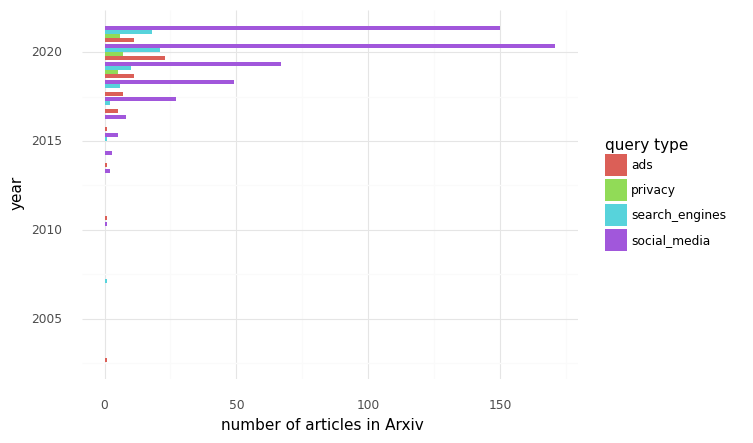

<ggplot: (8737668466803)>

In [76]:
p = (
    ggplot(data = arxiv_data)
    + aes(x = "year", y = "count", fill = "query_name")
    + geom_bar(stat = "identity", position = "dodge")   
    + labs(
        y = "number of articles in Arxiv",
        fill = "query type")
    + coord_flip()
)
#export_plot(plot = p, filename = "arxiv_timeseries.pdf", fileformat = "pdf")

p

# Analysis: mediacloud

In [8]:
md_data = pd.read_csv("data/mediacloud_data.csv")[["date", "count", "query", "query_name"]]
#pd.wide_to_long(data, ["search_engines", "advertising", "social_media"], sep="-", i = "date", j = "query")
md_data = md_data.melt(id_vars=['date', "query", "query_name"], var_name='query_type', value_name='article_count')
md_data["date"] = md_data["date"].astype("datetime64")
md_data


,date,query,query_name,query_type,article_ratio
0,2013-01-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000071
1,2013-02-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000067
2,2013-03-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000037
3,2013-04-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000042
4,2013-05-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000032
...,...,...,...,...,...
419,2021-06-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,ratio,0.000371
420,2021-07-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,ratio,0.000447
421,2021-08-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,ratio,0.000485
422,2021-09-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,ratio,0.000499


/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: plots/mediacloud_timeseries.pdf
/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:729: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fileformat" which is no longer supported as of 3.3 and will become an error two minor releases later


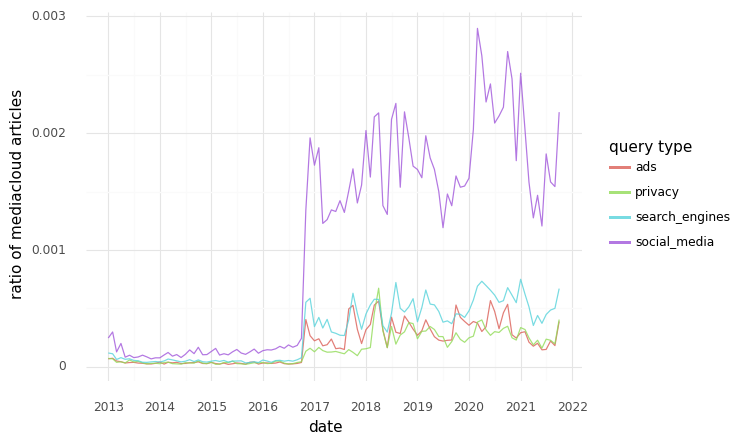

<ggplot: (8737680709470)>

In [9]:
p = (
    ggplot(data = md_data)
    + aes(x = "date", y = "article_ratio", color = "query_name")
    + geom_line(alpha = 0.8) 
    + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y'))   
    + labs(
        y = "ratio of mediacloud articles",
        color = "query type")
)
export_plot(plot = p, filename = "mediacloud_timeseries.pdf", fileformat = "pdf")

p

In [10]:
md_data[md_data.article_ratio.isin(md_data.groupby("query_name")["article_ratio"].max())]

,date,query,query_name,query_type,article_ratio
63,2018-04-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,ratio,0.000672
195,2020-06-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",ads,ratio,0.000566
298,2020-03-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",social_media,ratio,0.002897
414,2021-01-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,ratio,0.000748


# analysis combined

In [86]:
md_data = pd.read_csv("data/mediacloud_data.csv")[["date", "count", "query", "query_name"]]
#pd.wide_to_long(data, ["search_engines", "advertising", "social_media"], sep="-", i = "date", j = "query")
md_data = md_data.melt(id_vars=['date', "query", "query_name"], var_name='query_type', value_name='article_count')
md_data["date"] = md_data["date"].astype("datetime64")
md_data["year"] = md_data.date.dt.year
md_data

,date,query,query_name,query_type,article_count,year
0,2013-01-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,count,82,2013
1,2013-02-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,count,75,2013
2,2013-03-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,count,78,2013
3,2013-04-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,count,119,2013
4,2013-05-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",privacy,count,142,2013
...,...,...,...,...,...,...
419,2021-06-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,count,10616,2021
420,2021-07-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,count,12687,2021
421,2021-08-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,count,10311,2021
422,2021-09-01,"(""fake news"" OR ""misinformation"" OR ""disinform...",search_engines,count,14432,2021


In [89]:
plot_data1 = arxiv_data[arxiv_data.year > 2015].rename(columns = {"count": "article_count", "query_type": "query_name"})
plot_data1["data_source"] = "arxiv pre-prints"
plot_data1

,year,article_count,query_name,data_source
12,2016,8,social_media,arxiv pre-prints
13,2017,27,social_media,arxiv pre-prints
14,2018,49,social_media,arxiv pre-prints
15,2019,67,social_media,arxiv pre-prints
16,2020,171,social_media,arxiv pre-prints
17,2021,150,social_media,arxiv pre-prints
12,2016,0,search_engines,arxiv pre-prints
13,2017,2,search_engines,arxiv pre-prints
14,2018,6,search_engines,arxiv pre-prints
15,2019,10,search_engines,arxiv pre-prints


In [90]:
plot_data2 = md_data[md_data.year > 2015].groupby(["year", "query_name"], as_index=False)["article_count"].sum()
plot_data2["data_source"] = "mediacloud news articles"

plot_data2

,year,query_name,article_count,data_source
0,2016,ads,6852,mediacloud news articles
1,2016,privacy,4389,mediacloud news articles
2,2016,search_engines,11812,mediacloud news articles
3,2016,social_media,35203,mediacloud news articles
4,2017,ads,27154,mediacloud news articles
5,2017,privacy,13724,mediacloud news articles
6,2017,search_engines,39142,mediacloud news articles
7,2017,social_media,156101,mediacloud news articles
8,2018,ads,57071,mediacloud news articles
9,2018,privacy,48899,mediacloud news articles


In [91]:
plot_data = pd.concat([plot_data1, plot_data2])
plot_data

,year,article_count,query_name,data_source
12,2016,8,social_media,arxiv pre-prints
13,2017,27,social_media,arxiv pre-prints
14,2018,49,social_media,arxiv pre-prints
15,2019,67,social_media,arxiv pre-prints
16,2020,171,social_media,arxiv pre-prints
17,2021,150,social_media,arxiv pre-prints
12,2016,0,search_engines,arxiv pre-prints
13,2017,2,search_engines,arxiv pre-prints
14,2018,6,search_engines,arxiv pre-prints
15,2019,10,search_engines,arxiv pre-prints


/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: plots/combined_timeseries.pdf
/home/jr/.local/lib/python3.8/site-packages/plotnine/ggplot.py:729: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fileformat" which is no longer supported as of 3.3 and will become an error two minor releases later


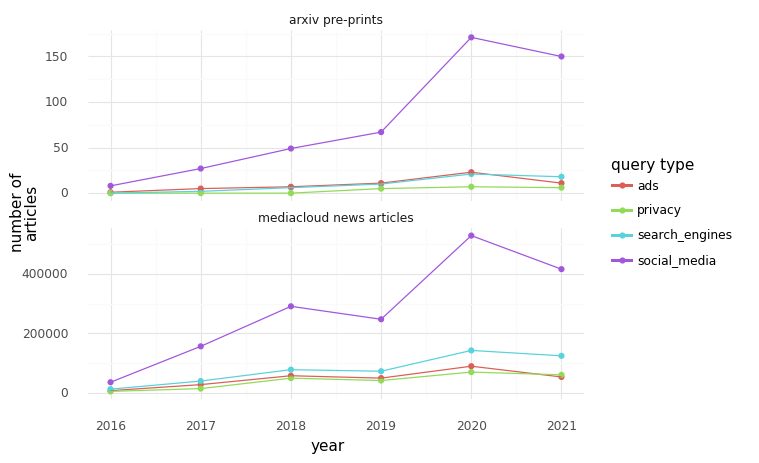

<ggplot: (8737666867523)>

In [112]:
p = (
    ggplot(data = plot_data)
    + aes(x = "year", y = "article_count", fill = "query_name", color = "query_name")
    + geom_point()   
    + geom_line()
    + labs(
        y = "number of\narticles",
        fill = "query type",
        color = "query type")
    + facet_wrap("data_source", scales = "free_y", nrow = 2)
)
export_plot(plot = p, filename = "combined_timeseries.pdf", fileformat = "pdf",  height=5, width=7, units = 'in')

p